In [1]:
import pandas as pd
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

#import hiddenlayer as h
import os
import sys
import pickle
sys.path.append(os.getcwd() + "/lib")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import prepare
import logging
import shap
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
device = "cpu"

In [3]:
def blockprint(func):
    def wrapper(*args, **kwargs):
        sys.stdout = open(os.devnull, 'w')
        results = func(*args, **kwargs)
        sys.stdout = sys.__stdout__
        return results
    return wrapper

In [4]:
# Define SHAP analysis function
@blockprint
def shap_explainer(model, data, feature_list):
    shap.initjs()
    explainer = shap.DeepExplainer(model, data)
    shap_values = explainer.shap_values(data)
    #shap.plots.bar(explainer.expected_value, shap_values[1], max_display=10)
    #shap.plots.bar(explainer(data))
    shap_values = np.squeeze(shap_values)
    #shap.plots.bar(shap_values=shap_values, features=feature_list, show_data=True)
    # summary plot
    #p = shap.force_plot(explainer.expected_value, shap_values[0:100], show=True, link="logit")
    #display(p)
    p = shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values[1][:20], features=feature_list[:20], show=True, link="logit")
    display(p)
    shap.decision_plot(base_value=explainer.expected_value, shap_values=shap_values[1][:20], features=feature_list[:20])
    data = torch.squeeze(data)
    #shap.force_plot(explainer.expected_value, shap_values[0,:], feature_names=feature_list,matplotlib=True, show=True, link="logit")
    shap.summary_plot(shap_values, features=data, feature_names=feature_list, max_display=25, plot_type="dot", alpha=1, show=True, plot_size=(10,15))
    shap.summary_plot(shap_values, features=data, feature_names=feature_list, max_display=10, plot_type="bar", alpha=1, show=True, plot_size=(10,15))
    print("shap_values: ", type(shap_values), shap_values.shape)
    print("data: ", type(data), data.shape)
    print("feature_list: ", type(feature_list), feature_list.shape)
    
    # save basic stats of shap values
    shap_values_df = pd.DataFrame(shap_values)
    shap_values_summary = pd.DataFrame(np.abs(shap_values_df).mean(), columns=['Mean Absolute SHAP value'])
    shap_values_summary['Max Absolute SHAP value'] = np.abs(shap_values_df).max()
    shap_values_summary['Median Absolute SHAP value'] = np.abs(shap_values_df).median()
    shap_values_summary["Gene"] = feature_list

    return explainer, shap_values, shap_values_summary

In [5]:
train_data_loader, val_data_loader, test_data_loader, count_train, count_val, count_test, X, input_df, return_X_train = prepare.PrepareprocessingDataset().data_structure(
            labels = "labels_list", 
            path = "data/HD_transformed_data.csv", 
            model = "resnet", 
            labels_high = "Huntington", 
            labels_low = "Normal", 
            batch_size = 64
            )

In [6]:
model_eval = torch.load("model/Model_res.pth")
logging.info("Model loaded.")
gene_list = input_df.columns[1:-1]
with open("background_res.txt","w")as handle:
    for gene in gene_list:
        handle.write(str(gene)+"\n")

2023-12-02 13:49:00,324 - INFO - Model loaded.


### resnet raw data

In [5]:
with open("./pickle/resnet_shaply_list.pkl", 'rb') as file:
    loaded_res_obj = pickle.load(file)

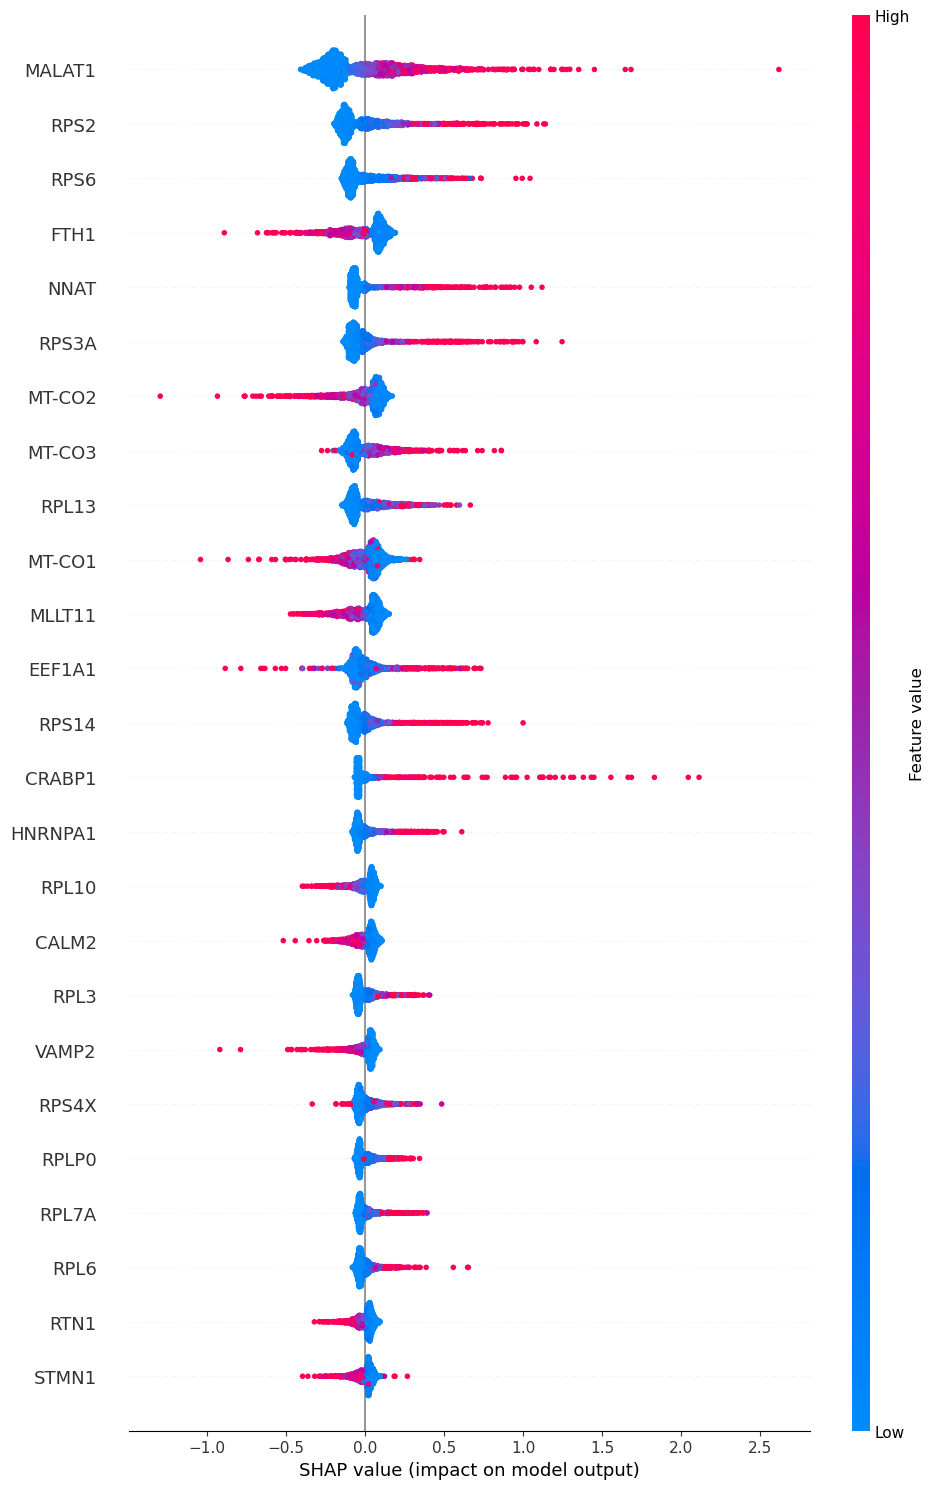

In [6]:
explainer = loaded_res_obj[0]
shap_values = loaded_res_obj[1]
shap_values_summary = loaded_res_obj[2]
data = loaded_res_obj[3]
feature_list = loaded_res_obj[4]
#p = shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values[1][:20], features=feature_list[:20], show=True, link="logit")
#display(p)
#shap.decision_plot(base_value=explainer.expected_value, shap_values=shap_values[1][:20], features=feature_list[:20])
shap.summary_plot(shap_values, features=data, feature_names=feature_list, max_display=25, plot_type="dot", alpha=1, show=True, plot_size=(10,15))

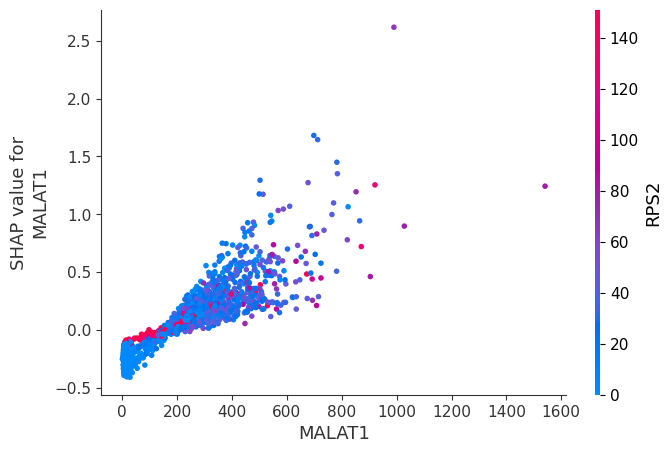

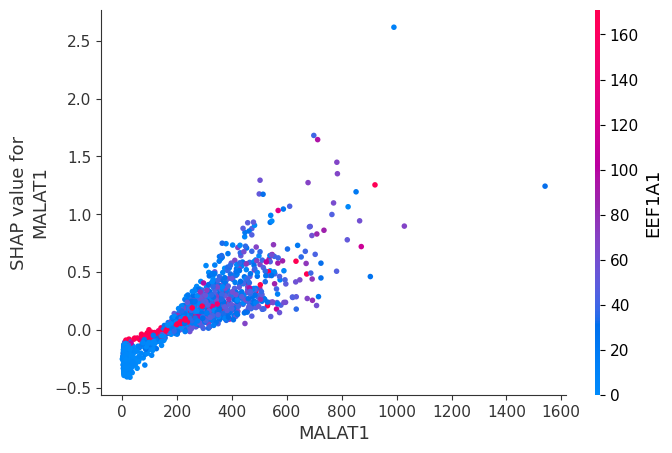

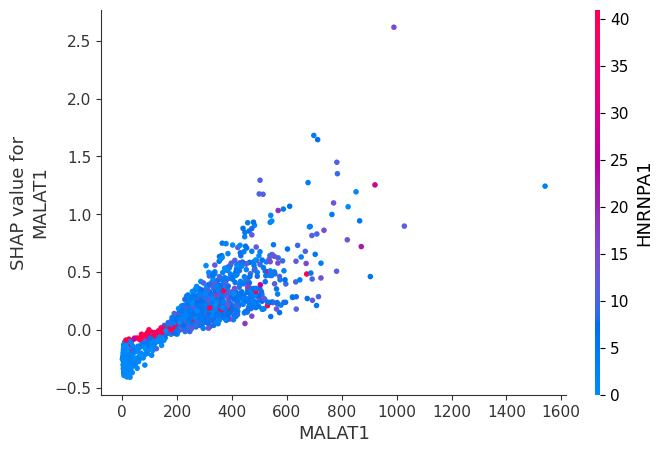

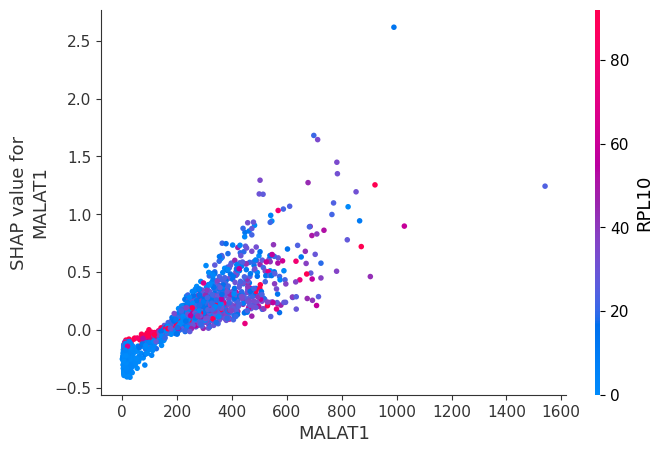

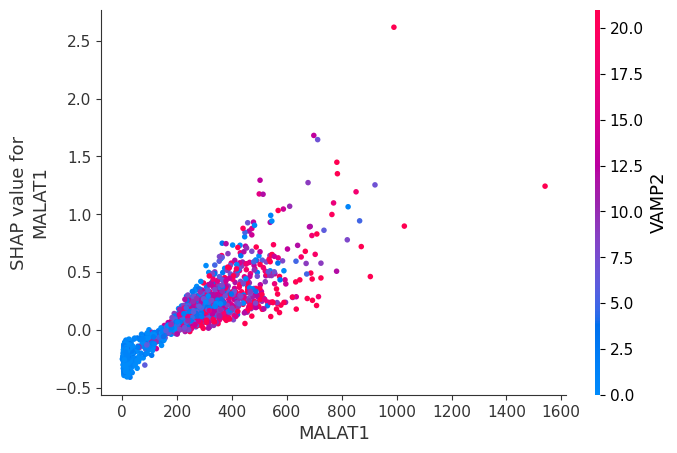

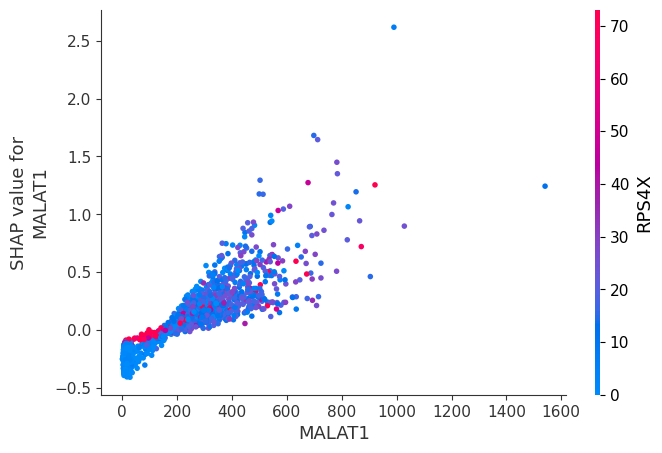

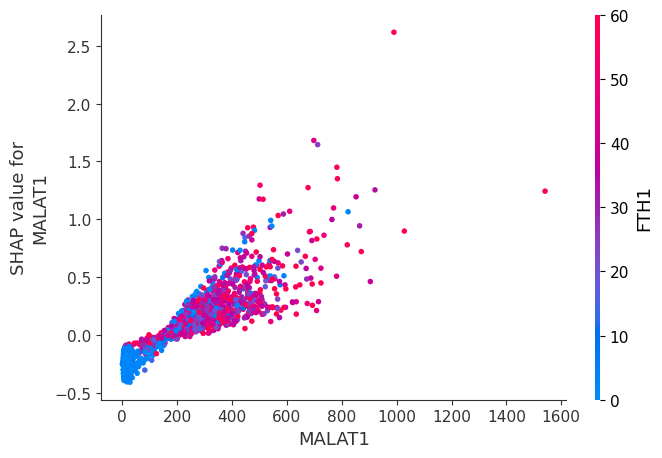

In [12]:
for i in ['RPS2','EEF1A1','HNRNPA1','RPL10','VAMP2','RPS4X','FTH1']:
    shap.dependence_plot('MALAT1', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

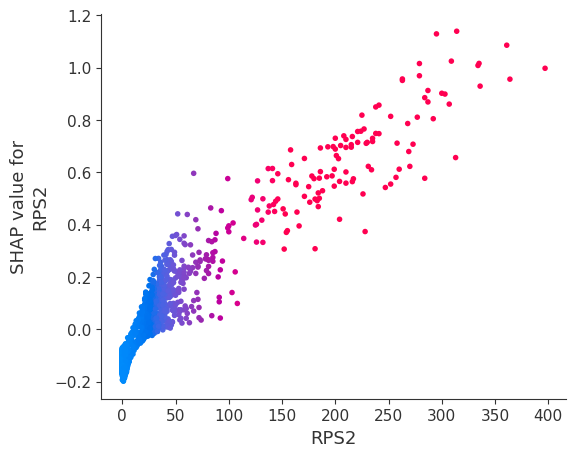

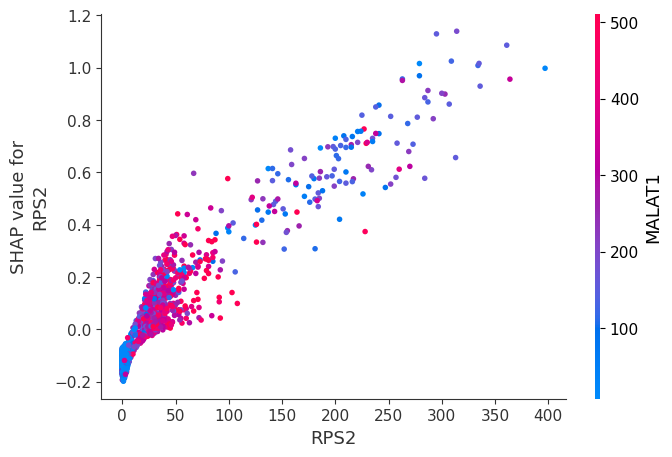

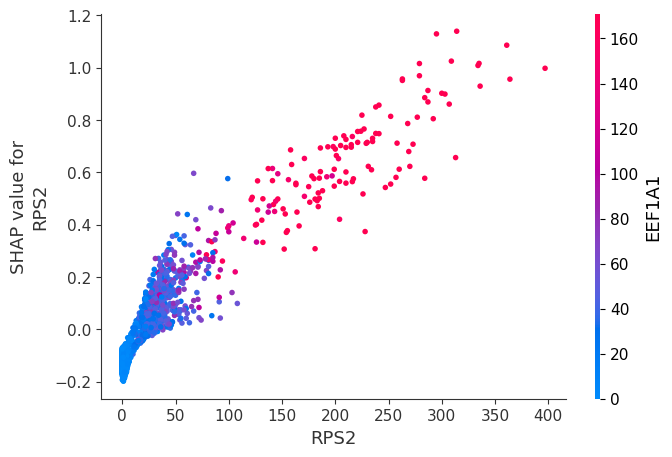

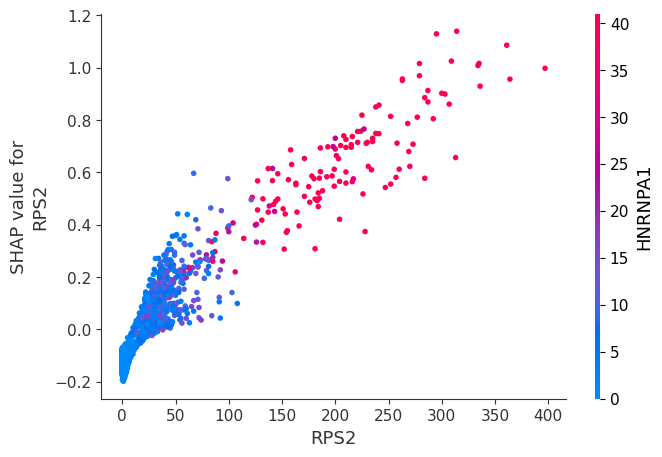

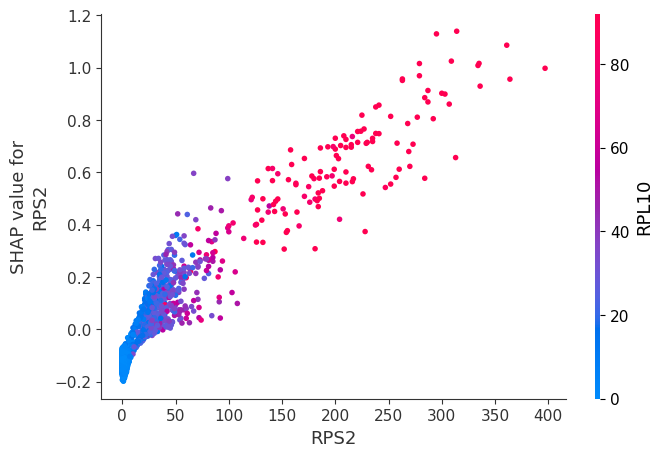

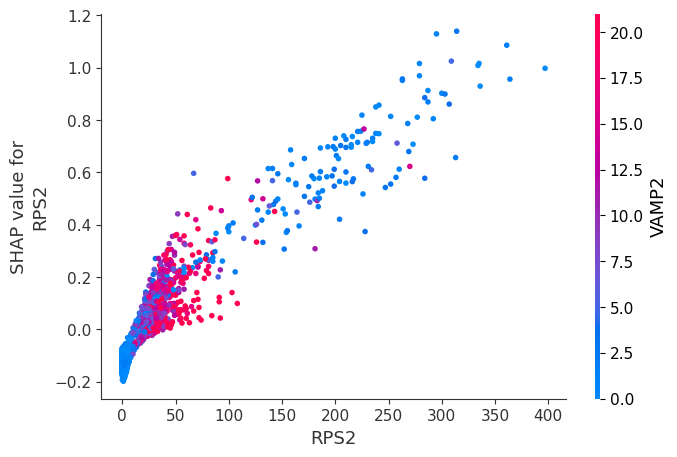

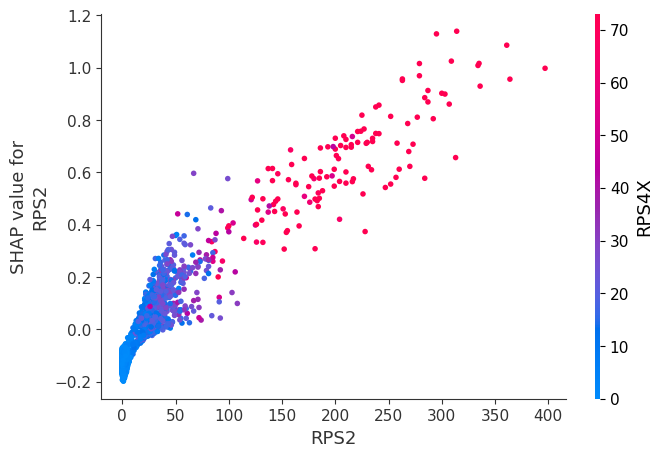

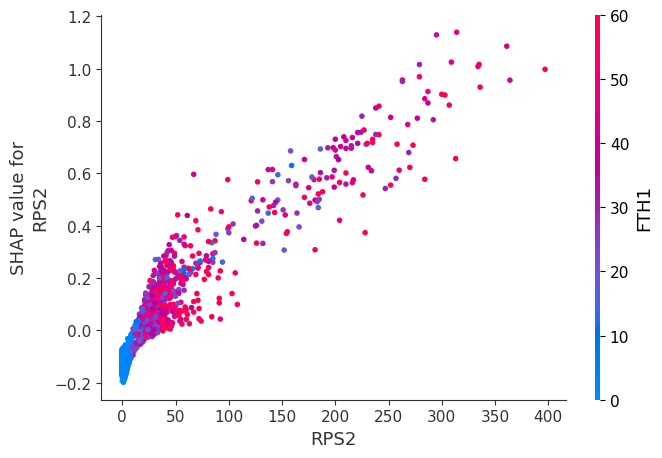

In [13]:
for i in ['RPS2','MALAT1','EEF1A1','HNRNPA1','RPL10','VAMP2','RPS4X','FTH1']:
    shap.dependence_plot('RPS2', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

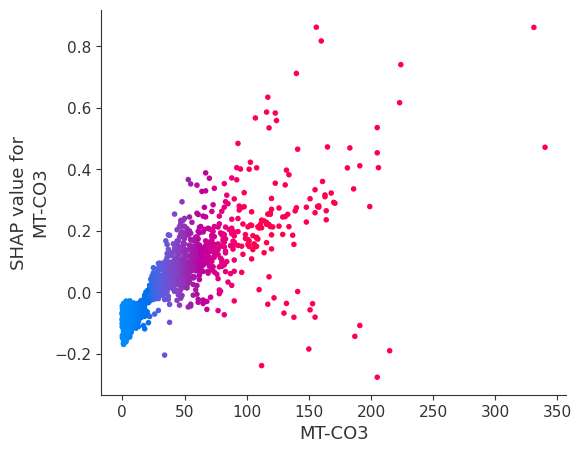

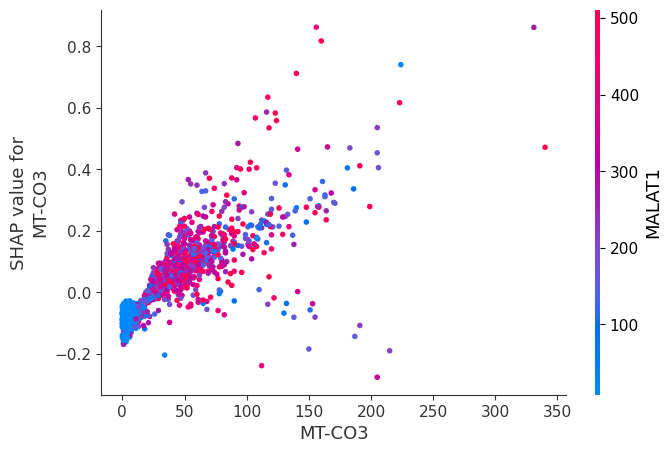

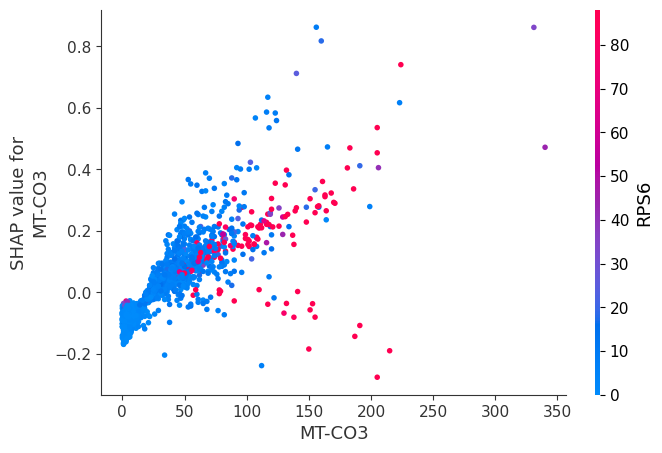

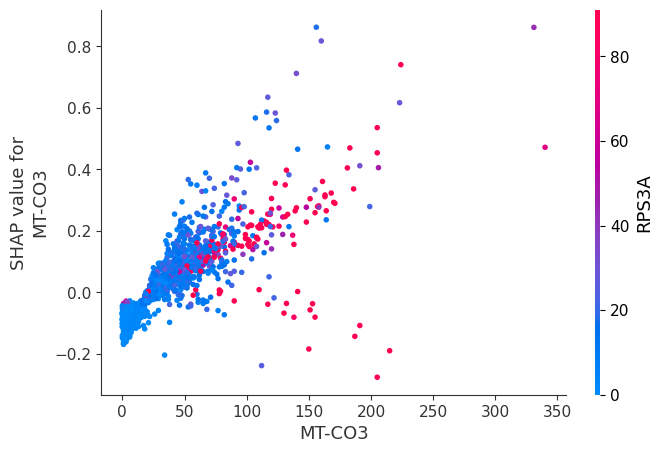

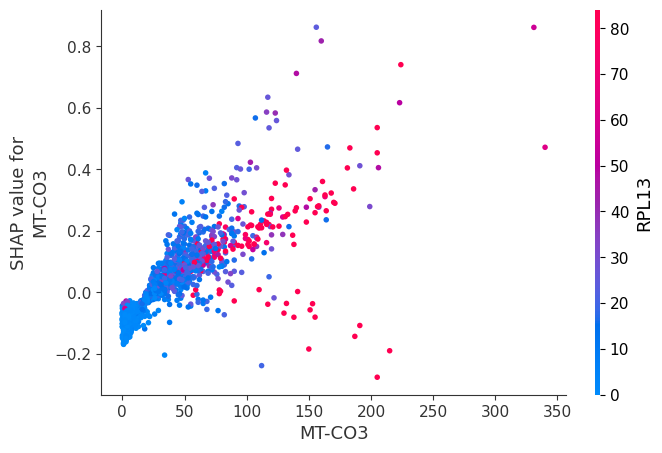

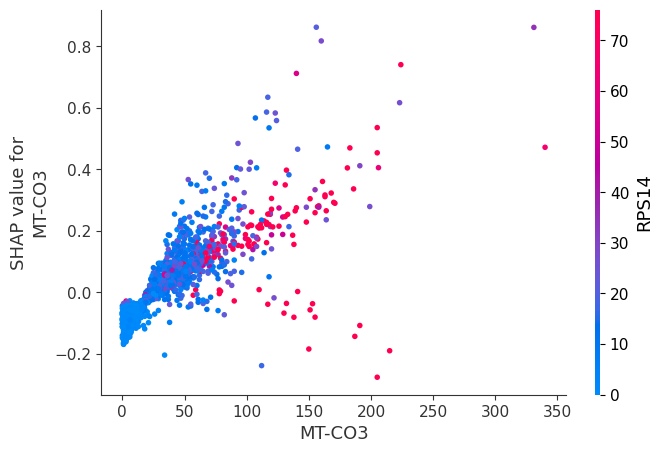

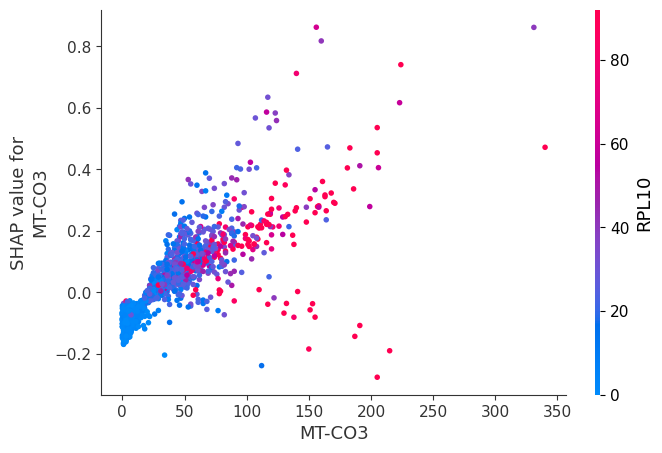

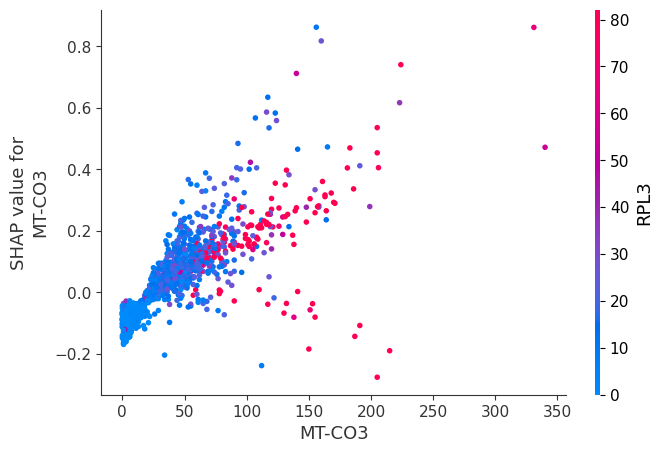

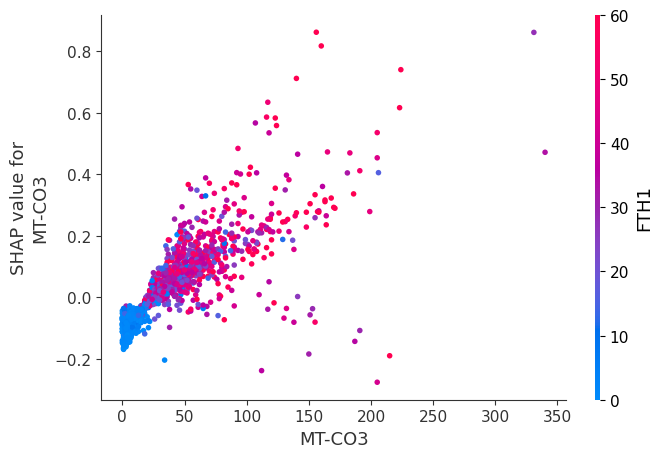

In [14]:
for i in ['MT-CO3','MALAT1','RPS6','RPS3A','RPL13','RPS14','RPL10','RPL3','FTH1']:
    shap.dependence_plot('MT-CO3', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

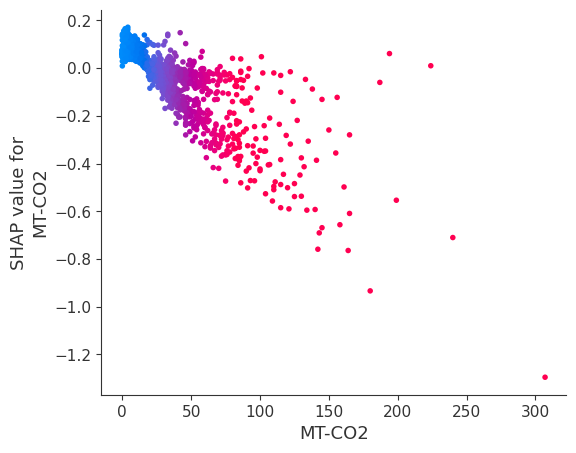

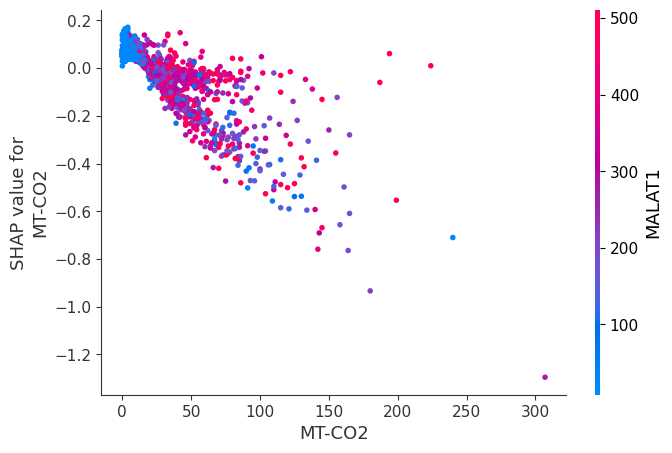

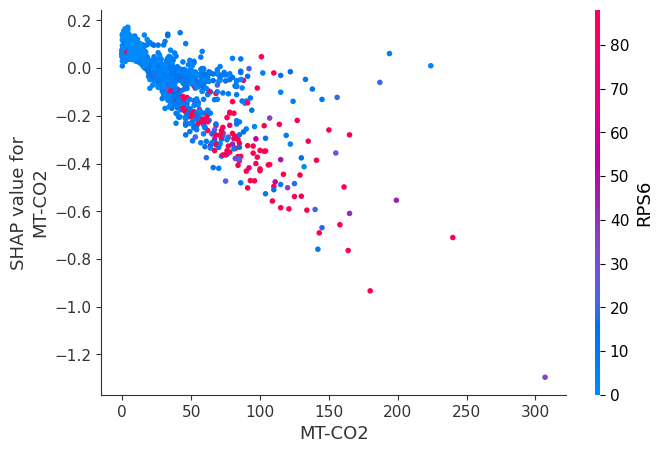

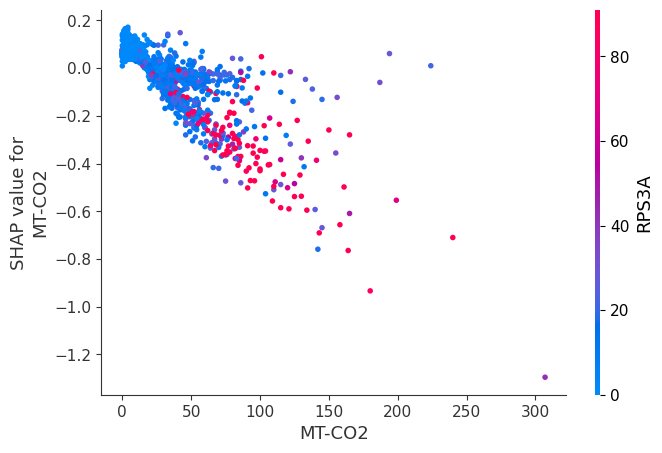

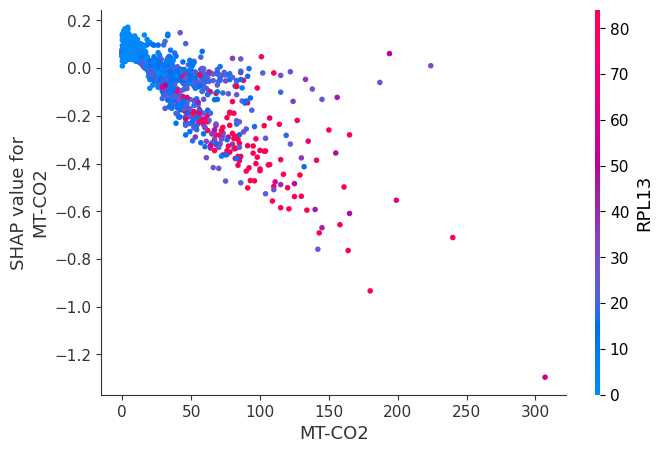

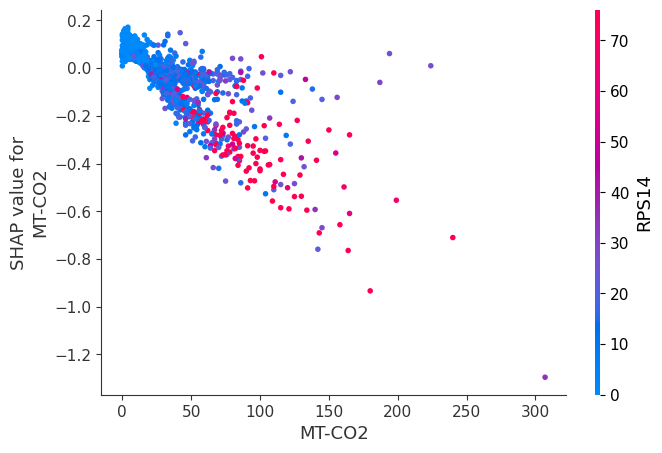

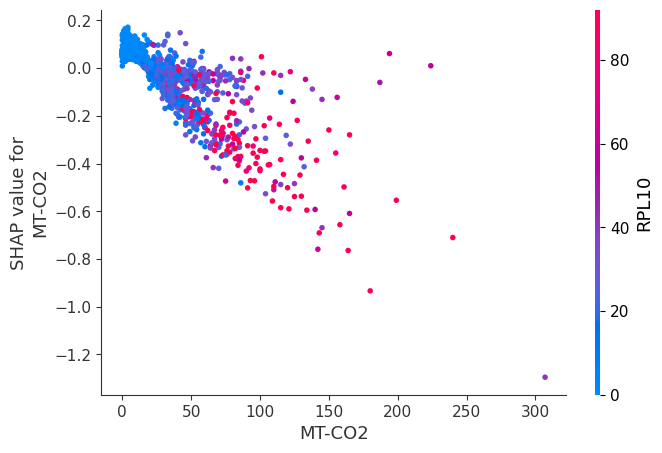

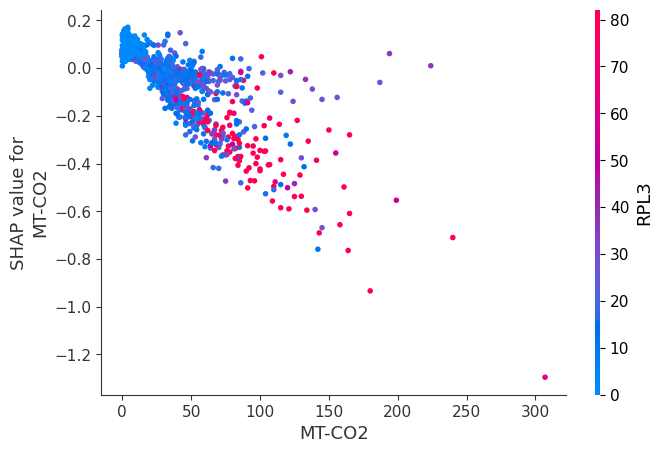

In [8]:
for i in ['MT-CO2','MALAT1','RPS6','RPS3A','RPL13','RPS14','RPL10','RPL3']:
    shap.dependence_plot('MT-CO2', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

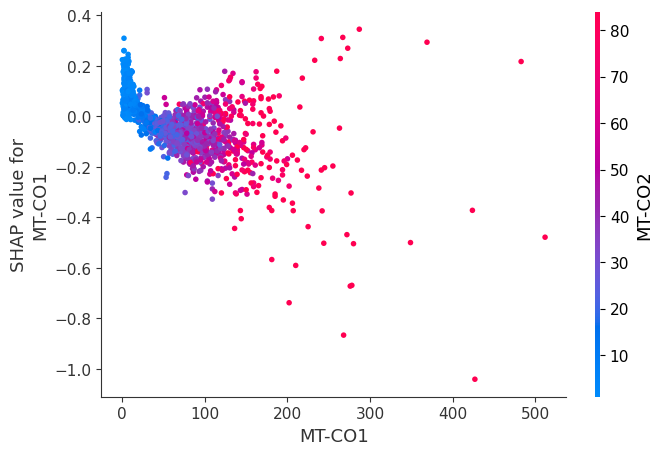

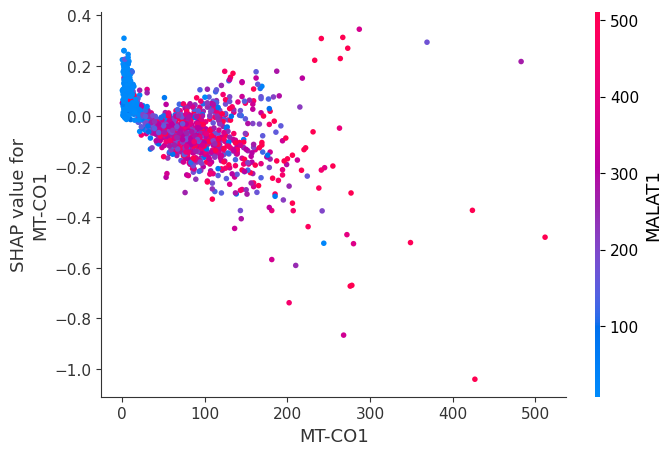

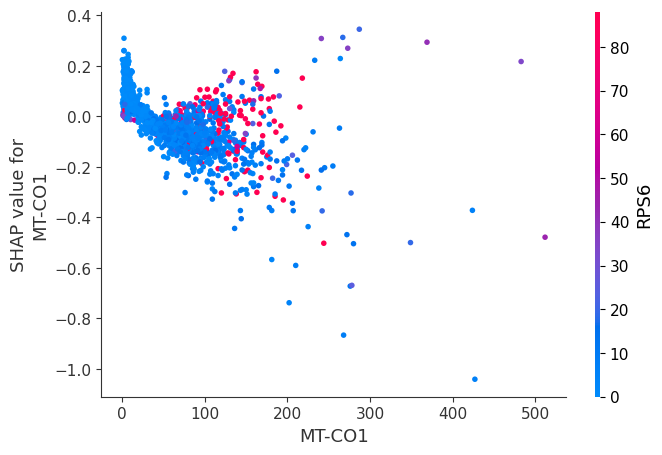

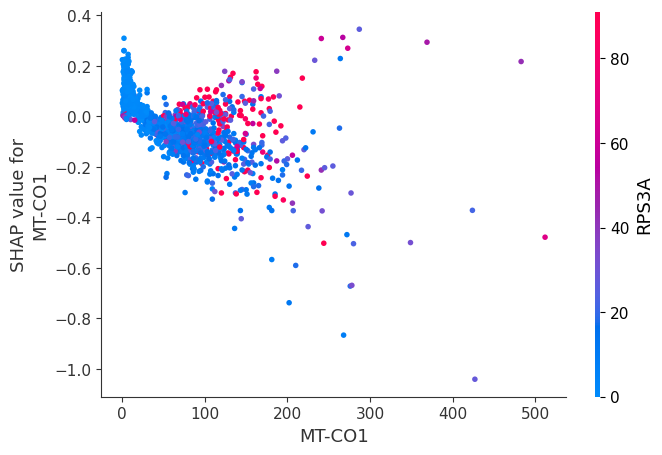

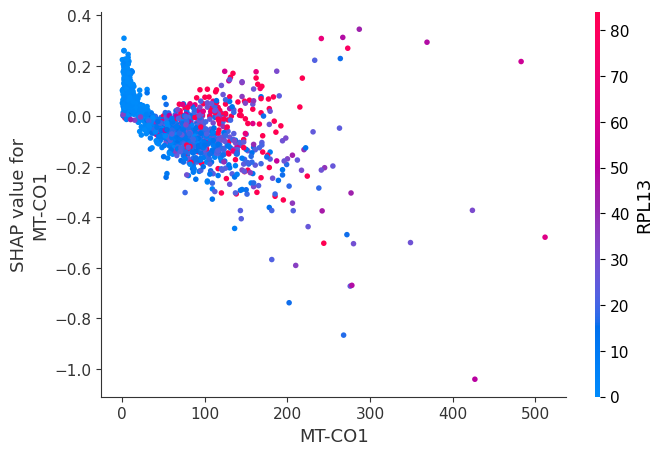

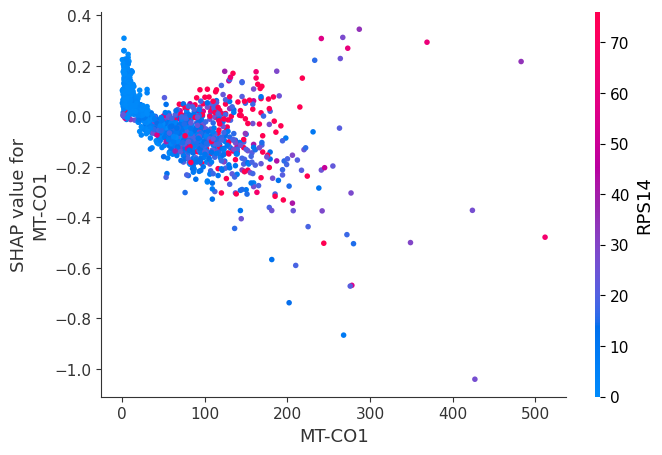

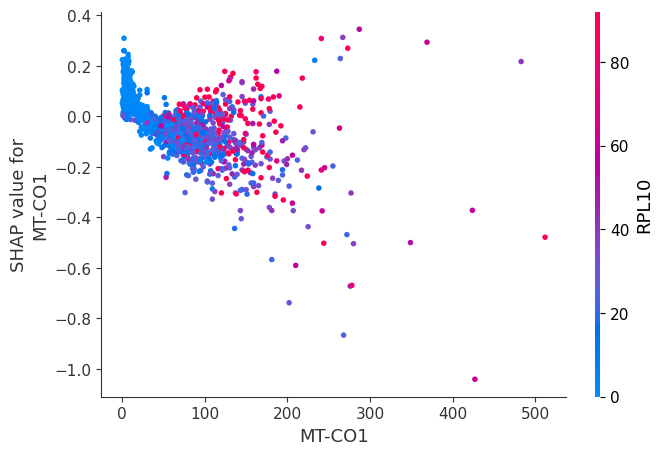

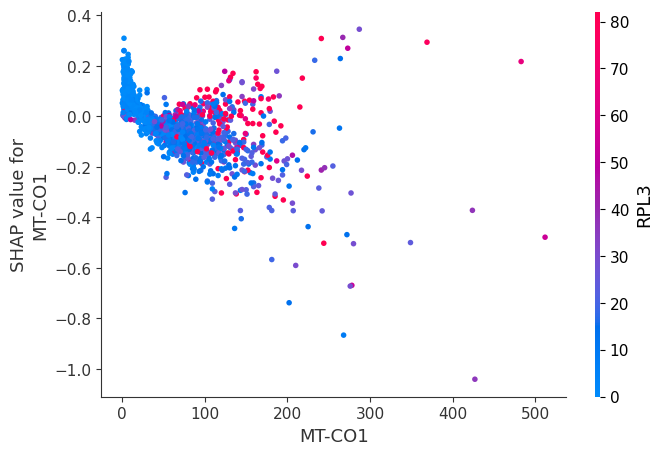

In [9]:
for i in ['MT-CO2','MALAT1','RPS6','RPS3A','RPL13','RPS14','RPL10','RPL3']:
    shap.dependence_plot('MT-CO1', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

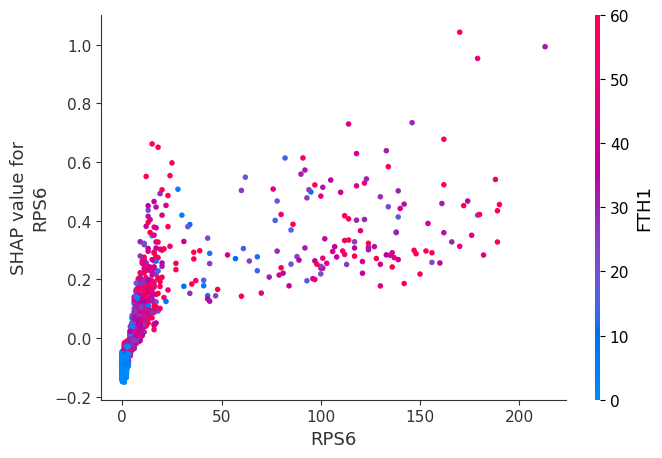

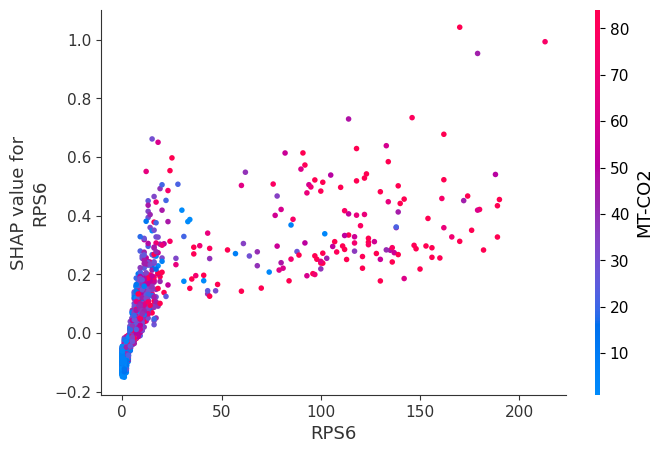

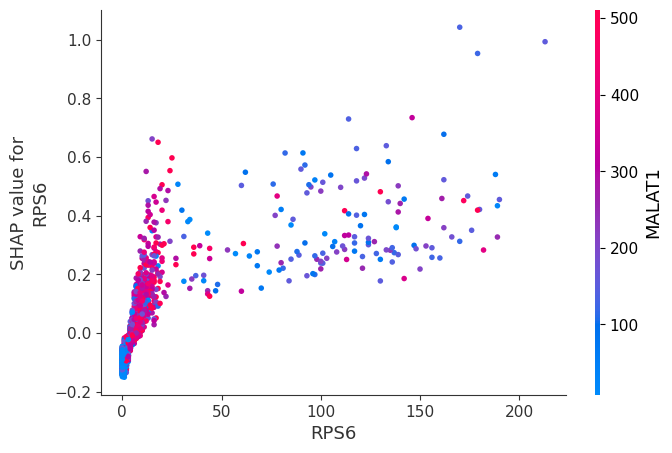

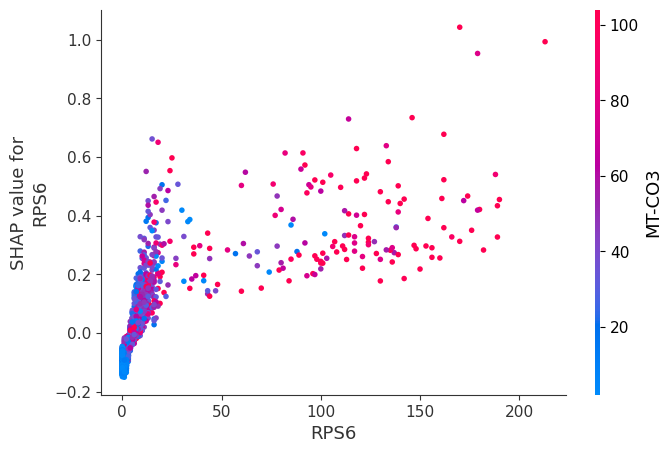

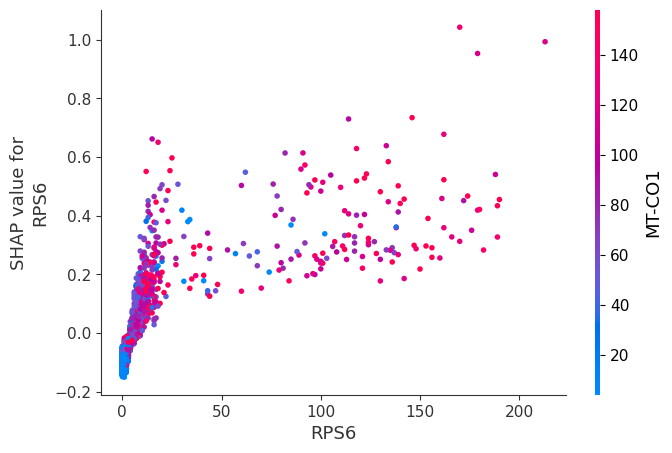

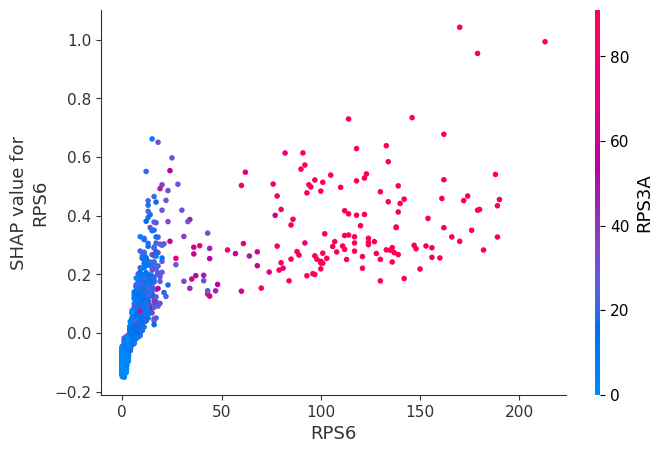

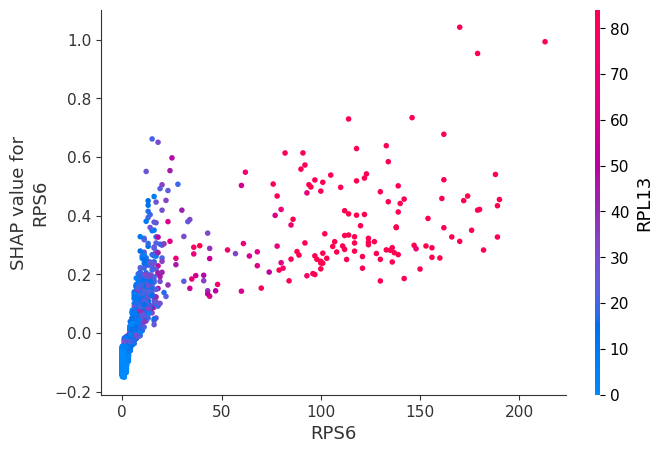

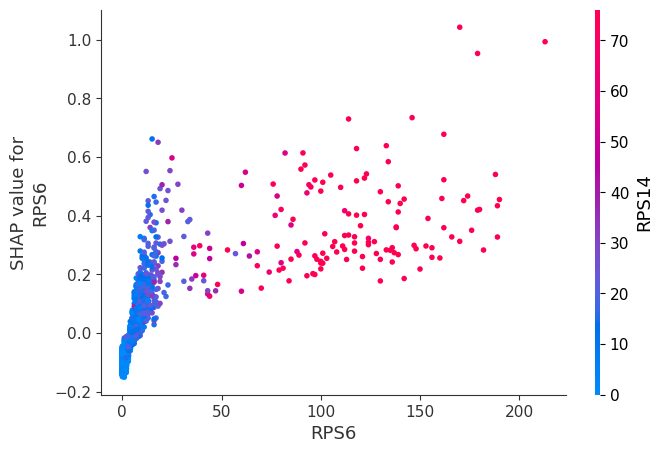

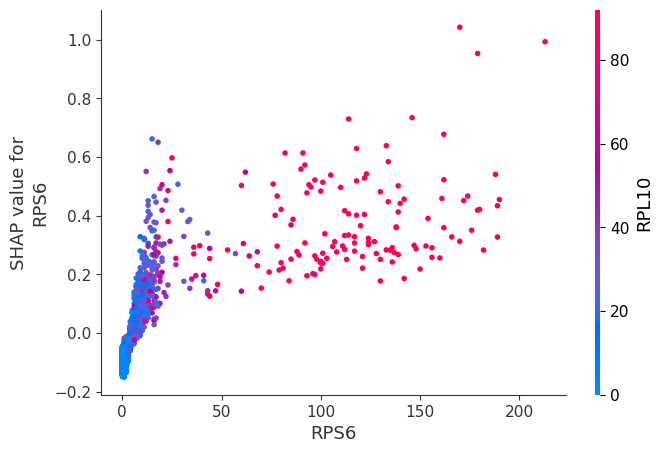

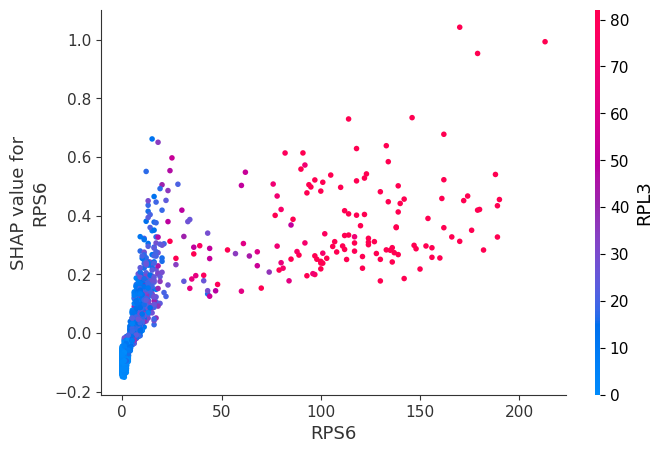

In [16]:
for i in ['FTH1','MT-CO2','MALAT1','MT-CO3','MT-CO1','RPS3A','RPL13','RPS14','RPL10','RPL3']:
    shap.dependence_plot('RPS6', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

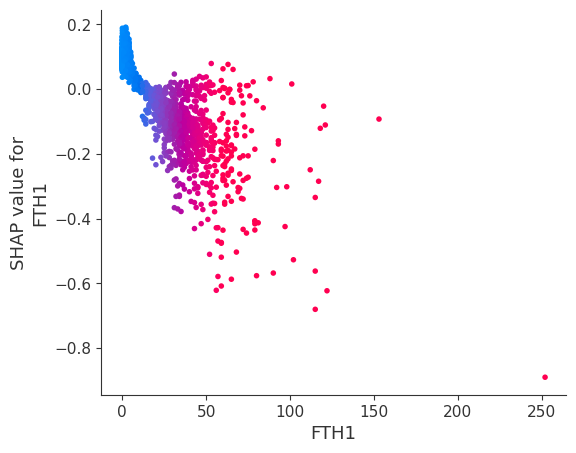

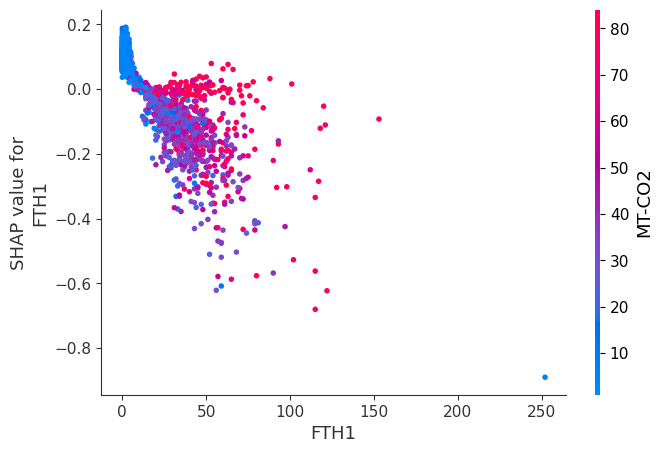

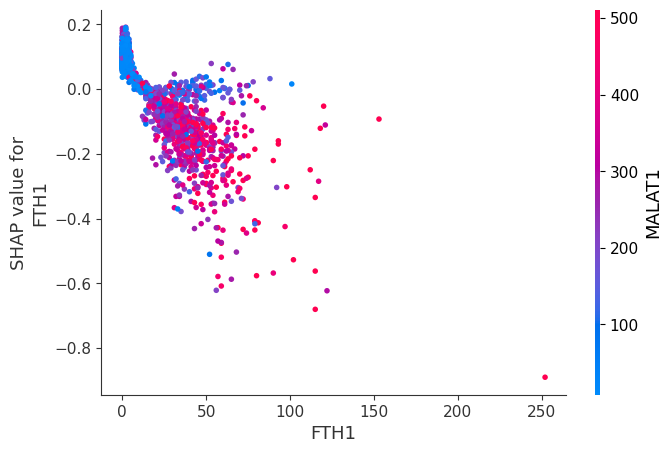

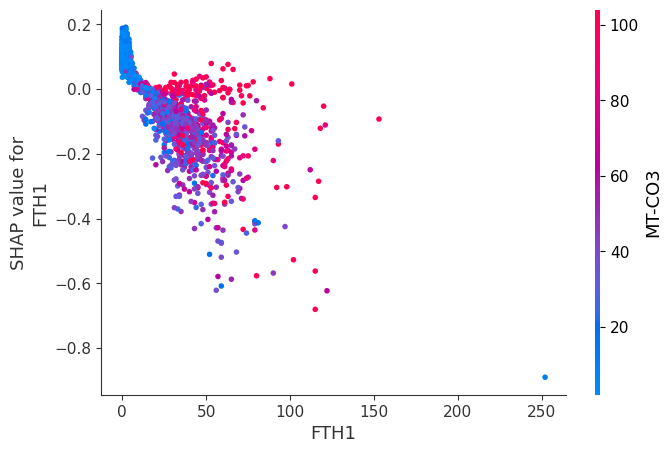

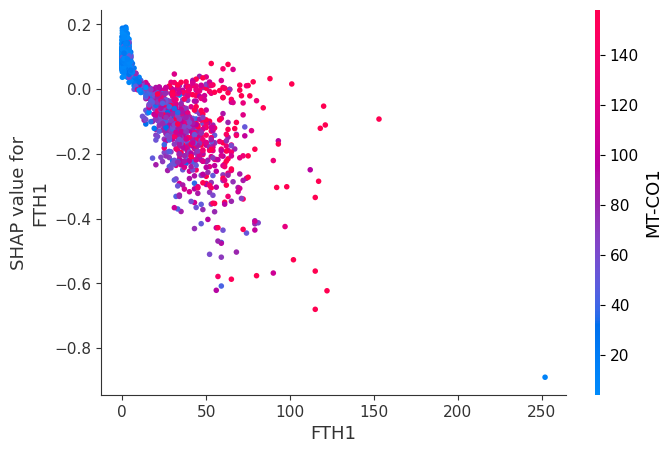

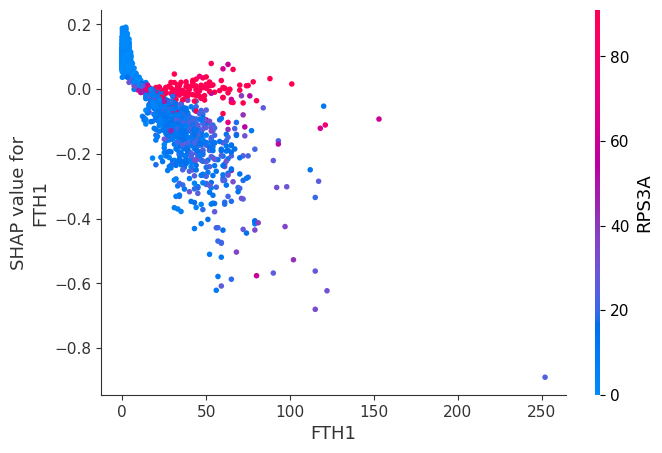

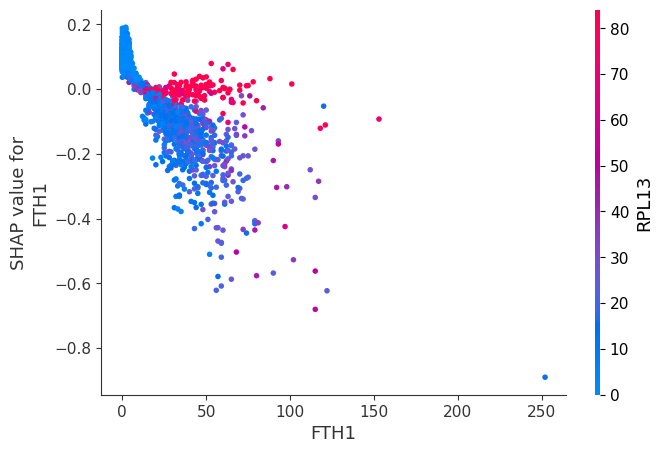

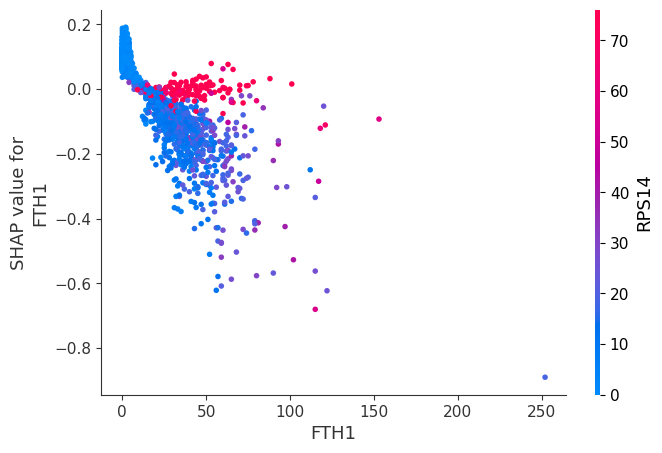

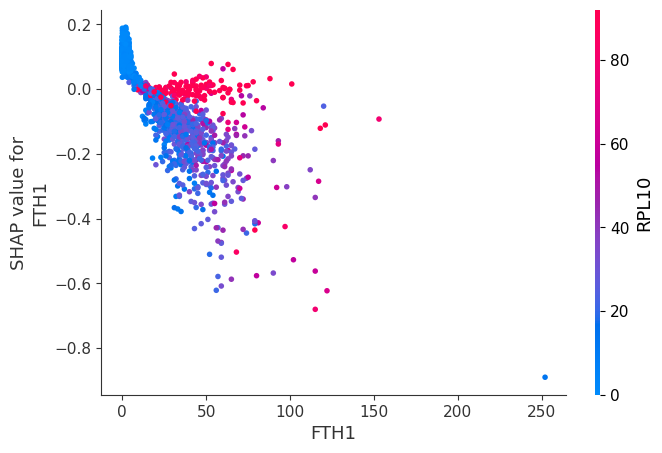

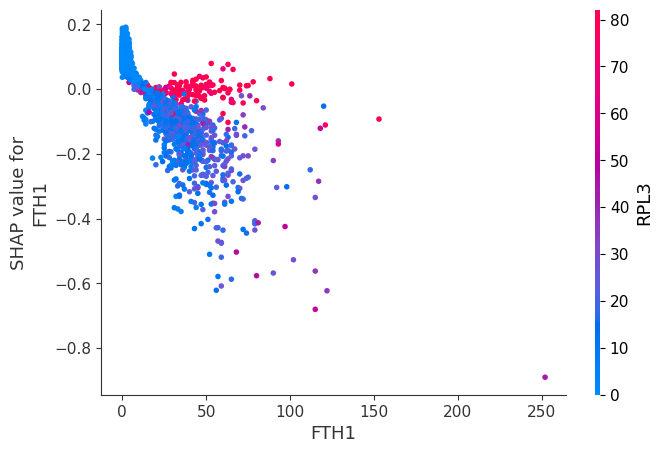

In [17]:
for i in ['FTH1','MT-CO2','MALAT1','MT-CO3','MT-CO1','RPS3A','RPL13','RPS14','RPL10','RPL3']:
    shap.dependence_plot('FTH1', shap_values, features=pd.DataFrame(data.numpy()), feature_names=feature_list, interaction_index=i, show=False)

In [14]:
sorted_shap_values = shap_values_summary.sort_values(by="Mean Absolute SHAP value", ascending=False)
genes = sorted_shap_values["Gene"].values[:25]
with open("SHAP_value_res_top25.txt","w")as handle:
    for gene in genes:
        handle.write(str(gene)+"\n")
output_path = 'shap_values_summary_res.xlsx'
sorted_shap_values.to_excel(output_path, index=False)